# Lab 3 Week 1 Presentation - Hyperfine Ladies

In [6]:
import ugradio
import astropy.coordinates
import astropy.time
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Observation Script

try:

    interf = ugradio.interf.Interferometer()
    obs = astropy.coordinates.EarthLocation(ugradio.nch.lon, ugradio.nch.lat, height=ugradio.nch.alt)
    hpm = ugradio.hp_multi.HP_Multimeter()

    #start data recording
    hpm.start_recording(1)

    for i in range(0, 120):
        print('Pointing!!!!!!!')
        t = astropy.time.Time(time.time(), format='unix')
        sun = astropy.coordinates.get_sun(t)
        altaz = astropy.coordinates.AltAz(obstime=t, location=obs)
        pointing = sun.transform_to(altaz)
        interf.point(pointing.alt.deg, pointing.az.deg)
        print('Pointed to : ' + str(interf.get_pointing()))
        print('Sun Coordinates : ra = ' + str(sun.ra.deg) + ', dec = ' + str(sun.dec.deg))
        print('i = ' + str(i))

        #save data
        volts, times = hpm.get_recording_data()
        np.savez('lab3_sun_data.npz', volts=volts, times=times)

        #wait 30 seconds
        time.sleep(30)

    #end data recording and stow telescope
    interf.stow()
    hpm.end_recording()

except Exception as e:
    
    print('ERROR: ' + str(e))
    if hpm:
        hpm.end_recording()
        print('RECORDING ENDED')
    print('STOWING TELESCOPE')
    interf.stow()

## Retrieve and Plot 1hr Sun Data

In [7]:
sun_data = np.load('lab3_sun_data.npz')

In [8]:
volts = sun_data['volts']
times = sun_data['times']

No handles with labels found to put in legend.


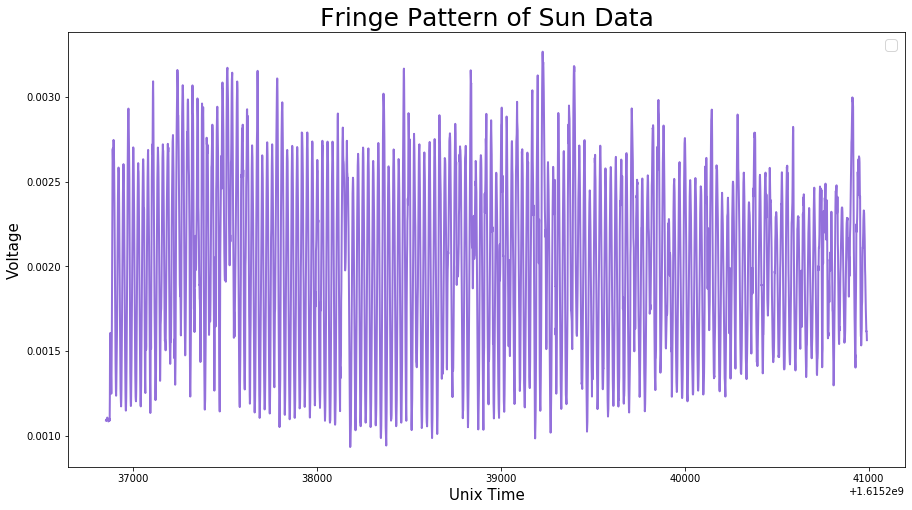

In [14]:
plt.figure(figsize=(15,8))
plt.plot(times, volts, "mediumpurple", linewidth=2)
plt.xlabel("Unix Time", fontsize=15)
plt.ylabel("Voltage", fontsize=15)
plt.title("Fringe Pattern of Sun Data", fontsize=25)
plt.legend(fontsize=15)

## Get Orion Nebula Info

In [ ]:
# find Orion Nebula
# see https://stellarium-web.org/
jd = ugradio.timing.julian_date(time.time())
ra = 
dec = 
altaz = ugradio.coord.get_altaz(ra, dec, jd)

In [ ]:
# calculate how often to repoint telescope
lam = 
D = 
theta = 1.22(lam / D)
# t * 15deg/hr < theta
# make t smaller though just cuz smaller is better